# Dimensionality Reduction

## Map of Machine Learning
![Alt text](https://i.pinimg.com/originals/6e/9b/dd/6e9bdde9d485fe2476738ab1733e8d49.png)

# Dimensionality Reduction

* High-dimensional data
    * Images
        * Dimension of images is now 1024x2048 $\approx$ 2 million pixels
    * Text articles
        * Thousands of words
        * Each made up of many characters
* We want to describe them in a simpler way

## Dimensionality Reduction (Conceptual)

![Alt Text](https://triumphmodular.com/wp-content/uploads/2015/05/project-newton-oakhill-interior.jpg)

## Dimensionality Reduction (Conceptual)

* Instead of describing the image by each of its 1.5 million pixels
* Describe high level contents in image
    * Objects
* Features of those objects
    * Color
    * Location
    * Number

## Example
![Alt text](http://web.mit.edu/cocosci/isomap/web2.jpg)

## Example
![Alt text](http://nlml.github.io/images/tsne/tsne-mnist.png)

## Example
![Alt text](https://image.slidesharecdn.com/recsysprephd2pub-140520033122-phpapp02/95/recommender-systems-matrices-and-graphs-73-638.jpg?cb=1400557051)

## Example
![Alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTEeag8YiLORE7IcGMiGAK0hapgYScGD3Sb4638fRMtlCP4pXdp)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from numpy import cov
np.random.seed(0)

# Principal Component Analysis (PCA)
* Dimensionality reduction algorithm
    * Find principal components
* Can also be used for:
    * Visualization
    * Noise filtering
    * Feature extraction and engineering

## Eigen Values and Eigen Vectors
* Eigen Values: 
    * How much the data varies
* Eigen Vector:
    * In what direction the data varies 
* $\lambda_i$ is paired with $e_i$

## Generate Data

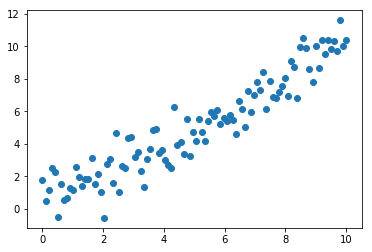

In [2]:
x = np.linspace(0,10,100)
y = x + np.random.normal(size=100)

# store in data matrix 
M = np.array([x,y]).T

plt.scatter(x, y)
plt.show()

### Principal Components

In [3]:
# mean of data (x,y)
mu = M.mean(axis=0)
# subtract the mean
mu_zero = M - mu

In [4]:
# eigenvalues and eigenvectores
values, vectors = np.linalg.eig(np.matmul(mu_zero.T, mu_zero))

(-6, 6)

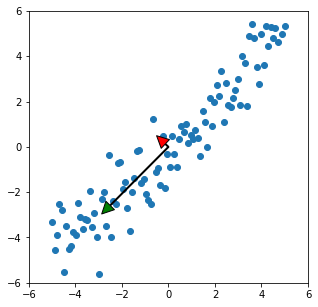

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(mu_zero[:,0],mu_zero[:,1])
# draw arrows
for e, v, color in zip(values, vectors.T, ["red","green"]):
    start, end = mu_zero.mean(axis=0), mu_zero.mean(axis=0) + np.sqrt(e)*v/10.
    plt.annotate('', xy=end,xytext=start, arrowprops=dict(facecolor=color, width=1.0))
    
plt.ylim(-6,6);plt.xlim(-6,6)

---
#  In Depth: Principal Component Analysis

Taken from [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb).
Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points:

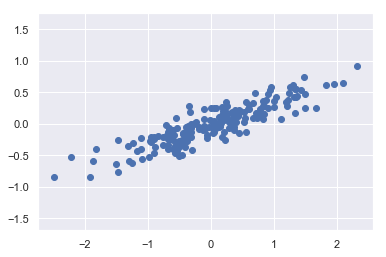

In [7]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.
This is reminiscent of the linear regression data we explored in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb), but the problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [9]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [10]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

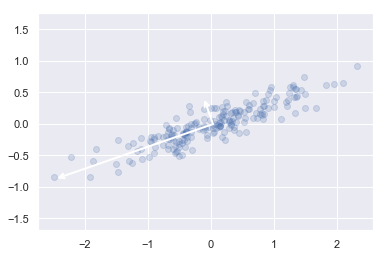

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## Principal Components
* Length of the vector ~ how "important" that axis is in describing the distribution of the data—more precisely, 
* Measure of the variance of the data on that axis

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

## PCA as dimensionality reduction

* Keep the largest principal components
* Resulting in a lower-dimensional projection of the data that preserves the maximal data variance

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("Original shape:   ", X.shape,"transformed shape:", X_pca.shape)

Original shape:    (200, 2) transformed shape: (200, 1)


## PCA as dimensionality reduction
* Reduce number of dimensions in data
* What would the reduced data look like?

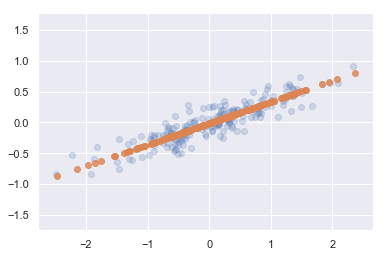

In [13]:
# Perform the inverse transform of this reduced data and plot it along with the original data:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## PCA for visualization: Hand-written digits
* Reduce dimensionality of images

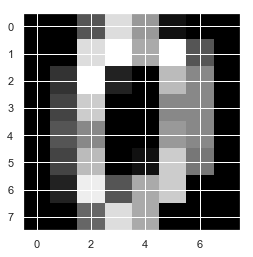

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
_=plt.imshow(digits.data[0].reshape(8,8),cmap=plt.get_cmap('gray'))

## PCA for visualization: Hand-written digits
* Data consists of 8×8 pixel images, meaning that they are 64-dimensional.
* Use PCA to project them to a more manageable number of dimensions, say two

In [15]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print('Original:', digits.data.shape, 'Projected:',projected.shape)

Original: (1797, 64) Projected: (1797, 2)


## PCA for visualization: Hand-written digits (Visualize)
* Plot the first two principal components of each point to learn about the data:

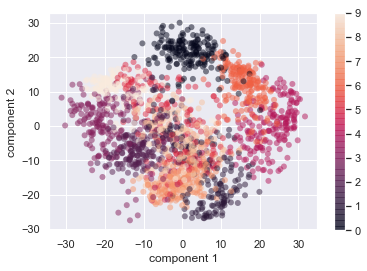

In [16]:
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1'); plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### What do the components mean?

* Each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

* Think of this as
    * Multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

* Reduce dimensionality by throwing out vectors
* Keep first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image
* Thrown out nearly 90% of the pixels!

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pixel-components.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Digits-Pixel-Components)

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pca-components.png?raw=1)

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

### Choosing the number of components

* How to pick the right number of components?
* Cumulative *explained variance ratio*

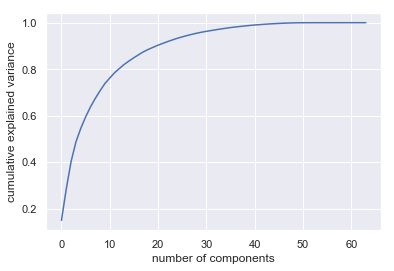

In [17]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components'); plt.ylabel('cumulative explained variance');

* How much of the total, 64-dimensional variance is contained within the first $N$ components
* How many components would I need to explain 80% of the variance?

## PCA as Noise Filtering

* Any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
* So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise

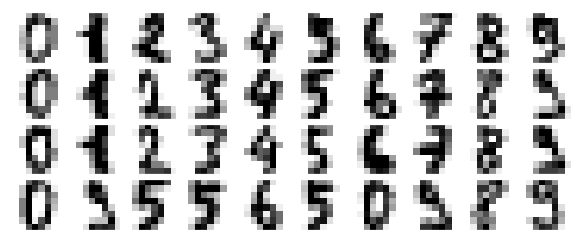

In [18]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
plot_digits(digits.data)

## Adding Noise

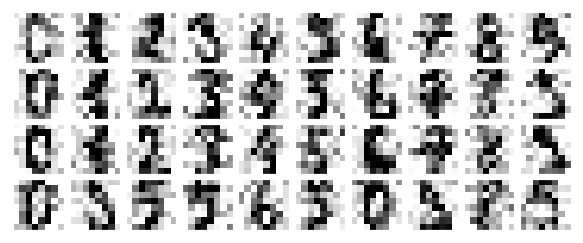

In [19]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

## Train a PCA on the noisy data
* Preserve 50% of the variance 

In [20]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

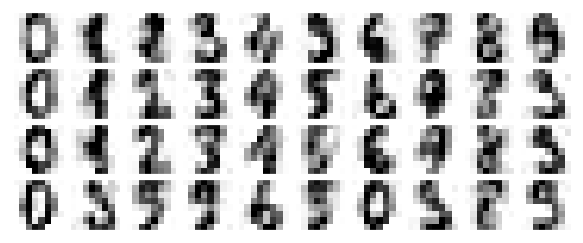

In [21]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Example: Eigenfaces

In [22]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print('Names:',faces.target_names)
print('Shape:',faces.images.shape)

Names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
Shape: (1348, 62, 47)


Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use ``RandomizedPCA``—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard ``PCA`` estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000).
We will take a look at the first 150 components:

In [23]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

C:\Users\jorda\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

## Visualize Principal Components
* These components are technically known as "eigenvectors" 
    * Images are often called "eigenfaces"

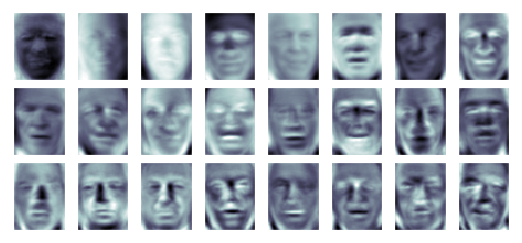

In [24]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

## Explained Variance

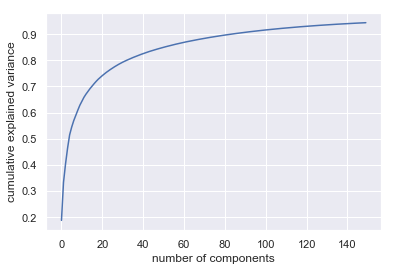

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance.
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.
To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

## Recreate Faces

In [26]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

C:\Users\jorda\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


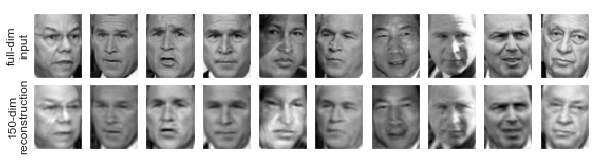

In [27]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.
This visualization makes clear why the PCA feature selection used in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.
What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

## Principal Component Analysis Summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``RandomizedPCA``, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term (see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)) that serves to enforce sparsity of the components.

In the following sections, we will look at other unsupervised learning methods that build on some of the ideas of PCA.

jupyter nbconvert Notebooks\DimensionalityReduction.ipynb --to slides --post serve